<a href="https://colab.research.google.com/github/Munindar123/Transportation_Assignment/blob/main/103117020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Problem Statment: Fit MLR model and interpret the modeling results

Importing pandas and matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Displaying top 5 rows of Dataset**

In [4]:
df = pd.read_csv("/content/Tranport_Dataset.csv")
df.head()

,No. of trips per household per day*,No. of working members,No. of student members,No. of motorized vehicle owned,Income (in thousands)
0,4,1,3,1,40
1,4,2,1,4,50
2,4,1,2,2,70
3,4,1,2,2,55
4,2,1,0,3,40


In [5]:
Roll_No = 20
df['No. of trips per household per day*'] = df['No. of trips per household per day*'] + Roll_No
df.head()

,No. of trips per household per day*,No. of working members,No. of student members,No. of motorized vehicle owned,Income (in thousands)
0,24,1,3,1,40
1,24,2,1,4,50
2,24,1,2,2,70
3,24,1,2,2,55
4,22,1,0,3,40


Checking correlation between variables

Correlation coefficient :- It is used to measure how strong a relationship is between two variables. Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.



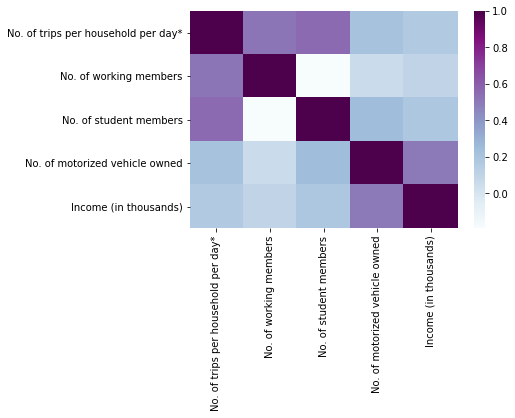

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),cmap = "BuPu")

In [9]:
lst = ['No. of working members'	,'No. of student members'	,'No. of motorized vehicle owned','Income (in thousands)']
from itertools import combinations
for i in range(2,5):
  for comb in combinations(lst,i):
    x = df[list(comb)].values
    y = df['No. of trips per household per day*']
    X = sm.add_constant(x)
    mlr = sm.OLS(y,X)
    result = mlr.fit()
    print('Independent variables: ',comb,)
    print('paramters: ',result.params)    
    print('R2: ', round(result.rsquared,4))
    print('Adj_R-squared',round(result.rsquared_adj,4),end = '\n\n')
    print("~"*100,end = '\n\n')

Independent variables:  ('No. of working members', 'No. of student members')
paramters:  const    21.150114
x1        0.937641
x2        0.821420
dtype: float64
R2:  0.7108
Adj_R-squared 0.7099

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Independent variables:  ('No. of working members', 'No. of motorized vehicle owned')
paramters:  const    22.169617
x1        0.734063
x2        0.162029
dtype: float64
R2:  0.3049
Adj_R-squared 0.3027

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Independent variables:  ('No. of working members', 'Income (in thousands)')
paramters:  const    22.290841
x1        0.732410
x2        0.005995
dtype: float64
R2:  0.2813
Adj_R-squared 0.279

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Independent variables:  ('No. of student members', 'No. of motorized vehicle owned')
paramters:  const 

In [8]:
x = df[['No. of working members'	,'No. of student members'	,'No. of motorized vehicle owned','Income (in thousands)']]
y = df['No. of trips per household per day*']
X = sm.add_constant(x)
output = sm.OLS(y,X).fit().summary()
print(output)

                                     OLS Regression Results                                    
Dep. Variable:     No. of trips per household per day*   R-squared:                       0.712
Model:                                             OLS   Adj. R-squared:                  0.710
Method:                                  Least Squares   F-statistic:                     396.7
Date:                                 Mon, 05 Oct 2020   Prob (F-statistic):          9.38e-172
Time:                                         05:21:32   Log-Likelihood:                -677.08
No. Observations:                                  646   AIC:                             1364.
Df Residuals:                                      641   BIC:                             1387.
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
                                     coe